In [ ]:
#Alteração 01 - Alterando arquivo original no repositório local do MacBook*/
#Alteração 02 - Alterando arquivo original no repositório local do MacBook - não fiz commit e vou dar um git push*/
#Alteração 03 - Alterando arquivo original no repositório local do MacBook - fiz commit e vou dar um git push - tem q aparecer até a Alteração 03*/
#Alteração 04 - Alterando este porém ele não deve constar no commit 04, pois será realizando somente o arquivo .txt
#Alteração 05 - Este commit deve constar as alterações 04 e 05"
#Alteração 06 - Alterando este arquivo e o txt"
#Alteração 07 - Alterando este arquivo e este txt - será enviado neste commit o arquivo git - teste2.txt"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. CARREGAMENTO DOS DADOS
# Dataset: IBM HR Analytics Employee Attrition & Performance
# Você pode baixar de: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Para este exemplo, vou criar um dataset sintético similar
np.random.seed(42)

# Criando dataset sintético para demonstração
n_samples = 500_000

data = {
    'Age': np.random.randint(18, 65, n_samples),
    'Attrition': np.random.choice(['Yes', 'No'], n_samples, p=[0.16, 0.84]),
    'BusinessTravel': np.random.choice(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], n_samples),
    'DailyRate': np.random.randint(100, 1500, n_samples),
    'Department': np.random.choice(['Sales', 'Research & Development', 'Human Resources'], n_samples),
    'DistanceFromHome': np.random.randint(1, 30, n_samples),
    'Education': np.random.randint(1, 5, n_samples),
    'EducationField': np.random.choice(['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources'], n_samples),
    'EmployeeCount': np.ones(n_samples, dtype=int),
    'EmployeeNumber': np.arange(1, n_samples + 1),
    'EnvironmentSatisfaction': np.random.randint(1, 5, n_samples),
    'Gender': np.random.choice(['Female', 'Male'], n_samples),
    'HourlyRate': np.random.randint(30, 100, n_samples),
    'JobInvolvement': np.random.randint(1, 5, n_samples),
    'JobLevel': np.random.randint(1, 6, n_samples),
    'JobRole': np.random.choice(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
                                'Manufacturing Director', 'Healthcare Representative', 'Manager',
                                'Sales Representative', 'Research Director', 'Human Resources'], n_samples),
    'JobSatisfaction': np.random.randint(1, 5, n_samples),
    'MaritalStatus': np.random.choice(['Single', 'Married', 'Divorced'], n_samples),
    'MonthlyIncome': np.random.randint(1000, 20000, n_samples),
    'MonthlyRate': np.random.randint(2000, 27000, n_samples),
    'NumCompaniesWorked': np.random.randint(0, 10, n_samples),
    'Over18': ['Y'] * n_samples,
    'OverTime': np.random.choice(['Yes', 'No'], n_samples, p=[0.28, 0.72]),
    'PercentSalaryHike': np.random.randint(11, 26, n_samples),
    'PerformanceRating': np.random.choice([3, 4], n_samples, p=[0.84, 0.16]),
    'RelationshipSatisfaction': np.random.randint(1, 5, n_samples),
    'StandardHours': [80] * n_samples,
    'StockOptionLevel': np.random.randint(0, 4, n_samples),
    'TotalWorkingYears': np.random.randint(0, 40, n_samples),
    'TrainingTimesLastYear': np.random.randint(0, 7, n_samples),
    'WorkLifeBalance': np.random.randint(1, 5, n_samples),
    'YearsAtCompany': np.random.randint(0, 40, n_samples),
    'YearsInCurrentRole': np.random.randint(0, 19, n_samples),
    'YearsSinceLastPromotion': np.random.randint(0, 16, n_samples),
    'YearsWithCurrManager': np.random.randint(0, 18, n_samples)
}

df = pd.DataFrame(data)

# Ajustando algumas relações lógicas
df.loc[df['YearsAtCompany'] < df['YearsInCurrentRole'], 'YearsInCurrentRole'] = df['YearsAtCompany']
df.loc[df['YearsAtCompany'] < df['YearsSinceLastPromotion'], 'YearsSinceLastPromotion'] = df['YearsAtCompany']
df.loc[df['TotalWorkingYears'] < df['YearsAtCompany'], 'TotalWorkingYears'] = df['YearsAtCompany']

print("Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape}")
print(f"Colunas: {df.columns.tolist()}")

Dataset carregado com sucesso!
Dimensões: (500000, 35)
Colunas: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [2]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,56,No,Non-Travel,464,Human Resources,25,3,Human Resources,1,1,...,4,80,3,24,5,2,18,0,2,9
1,46,No,Travel_Rarely,1278,Research & Development,20,3,Human Resources,1,2,...,1,80,3,19,2,1,19,18,0,12
2,32,No,Travel_Frequently,788,Human Resources,25,1,Technical Degree,1,3,...,2,80,2,24,1,1,2,2,2,16
3,60,No,Non-Travel,901,Sales,12,3,Life Sciences,1,4,...,1,80,2,16,2,2,16,16,6,3
4,25,No,Travel_Rarely,383,Sales,22,3,Life Sciences,1,5,...,1,80,0,36,5,2,36,10,2,3
5,38,No,Travel_Rarely,210,Research & Development,20,1,Medical,1,6,...,3,80,2,22,0,4,4,3,1,4
6,56,No,Travel_Rarely,789,Research & Development,26,3,Human Resources,1,7,...,2,80,1,24,4,3,24,12,11,15
7,36,Yes,Travel_Frequently,702,Sales,5,3,Technical Degree,1,8,...,3,80,1,19,2,1,19,0,12,1
8,40,No,Non-Travel,1472,Human Resources,13,2,Marketing,1,9,...,3,80,1,21,5,4,21,3,15,10
9,28,No,Non-Travel,379,Sales,11,4,Life Sciences,1,10,...,1,80,1,38,4,4,2,2,2,15


In [3]:
# 2.1 Informações básicas
print("\n=== INFORMAÇÕES DO DATASET ===")
print(df.info())


=== INFORMAÇÕES DO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Age                       500000 non-null  int64 
 1   Attrition                 500000 non-null  object
 2   BusinessTravel            500000 non-null  object
 3   DailyRate                 500000 non-null  int64 
 4   Department                500000 non-null  object
 5   DistanceFromHome          500000 non-null  int64 
 6   Education                 500000 non-null  int64 
 7   EducationField            500000 non-null  object
 8   EmployeeCount             500000 non-null  int64 
 9   EmployeeNumber            500000 non-null  int64 
 10  EnvironmentSatisfaction   500000 non-null  int64 
 11  Gender                    500000 non-null  object
 12  HourlyRate                500000 non-null  int64 
 13  JobInvolvement            5

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500000.0,41.016422,13.562028,18.0,29.00,41.0,53.00,64.0
DailyRate,500000.0,799.464338,403.839117,100.0,450.00,799.0,1149.00,1499.0
DistanceFromHome,500000.0,14.997016,8.364483,1.0,8.00,15.0,22.00,29.0
Education,500000.0,2.498350,1.117617,1.0,1.00,2.0,3.00,4.0
EmployeeCount,500000.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,500000.0,250000.500000,144337.711634,1.0,125000.75,250000.5,375000.25,500000.0
EnvironmentSatisfaction,500000.0,2.500082,1.118312,1.0,1.00,3.0,4.00,4.0
HourlyRate,500000.0,64.543414,20.198143,30.0,47.00,65.0,82.00,99.0
JobInvolvement,500000.0,2.500338,1.117359,1.0,2.00,3.0,3.00,4.0
JobLevel,500000.0,3.005608,1.413518,1.0,2.00,3.0,4.00,5.0


In [5]:
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"\nTaxa de Attrition: {(attrition_counts['Yes'] / len(df)) * 100:.2f}%")

Attrition
No     420363
Yes     79637
Name: count, dtype: int64

Taxa de Attrition: 15.93%


In [ ]:
# 2. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

# 2.1 Informações básicas
print("\n=== INFORMAÇÕES DO DATASET ===")
print(df.info())

print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
df.describe().T

# 2.2 Análise da variável alvo
print("\n=== DISTRIBUIÇÃO DA VARIÁVEL ALVO (Attrition) ===")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"\nTaxa de Attrition: {(attrition_counts['Yes'] / len(df)) * 100:.2f}%")


=== INFORMAÇÕES DO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int6

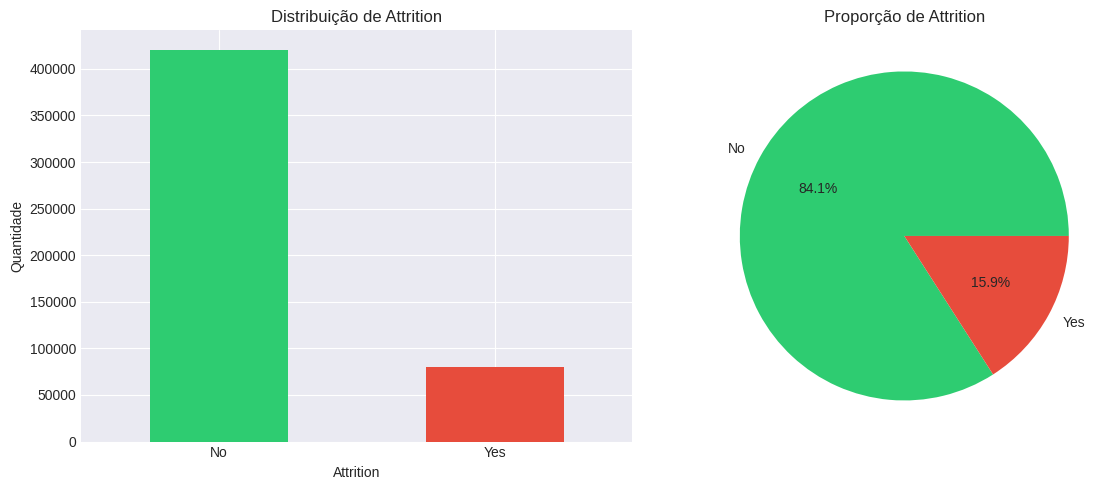


=== ANÁLISE DE VALORES AUSENTES ===
Não há valores ausentes no dataset!

=== VARIÁVEIS NUMÉRICAS (26) ===
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


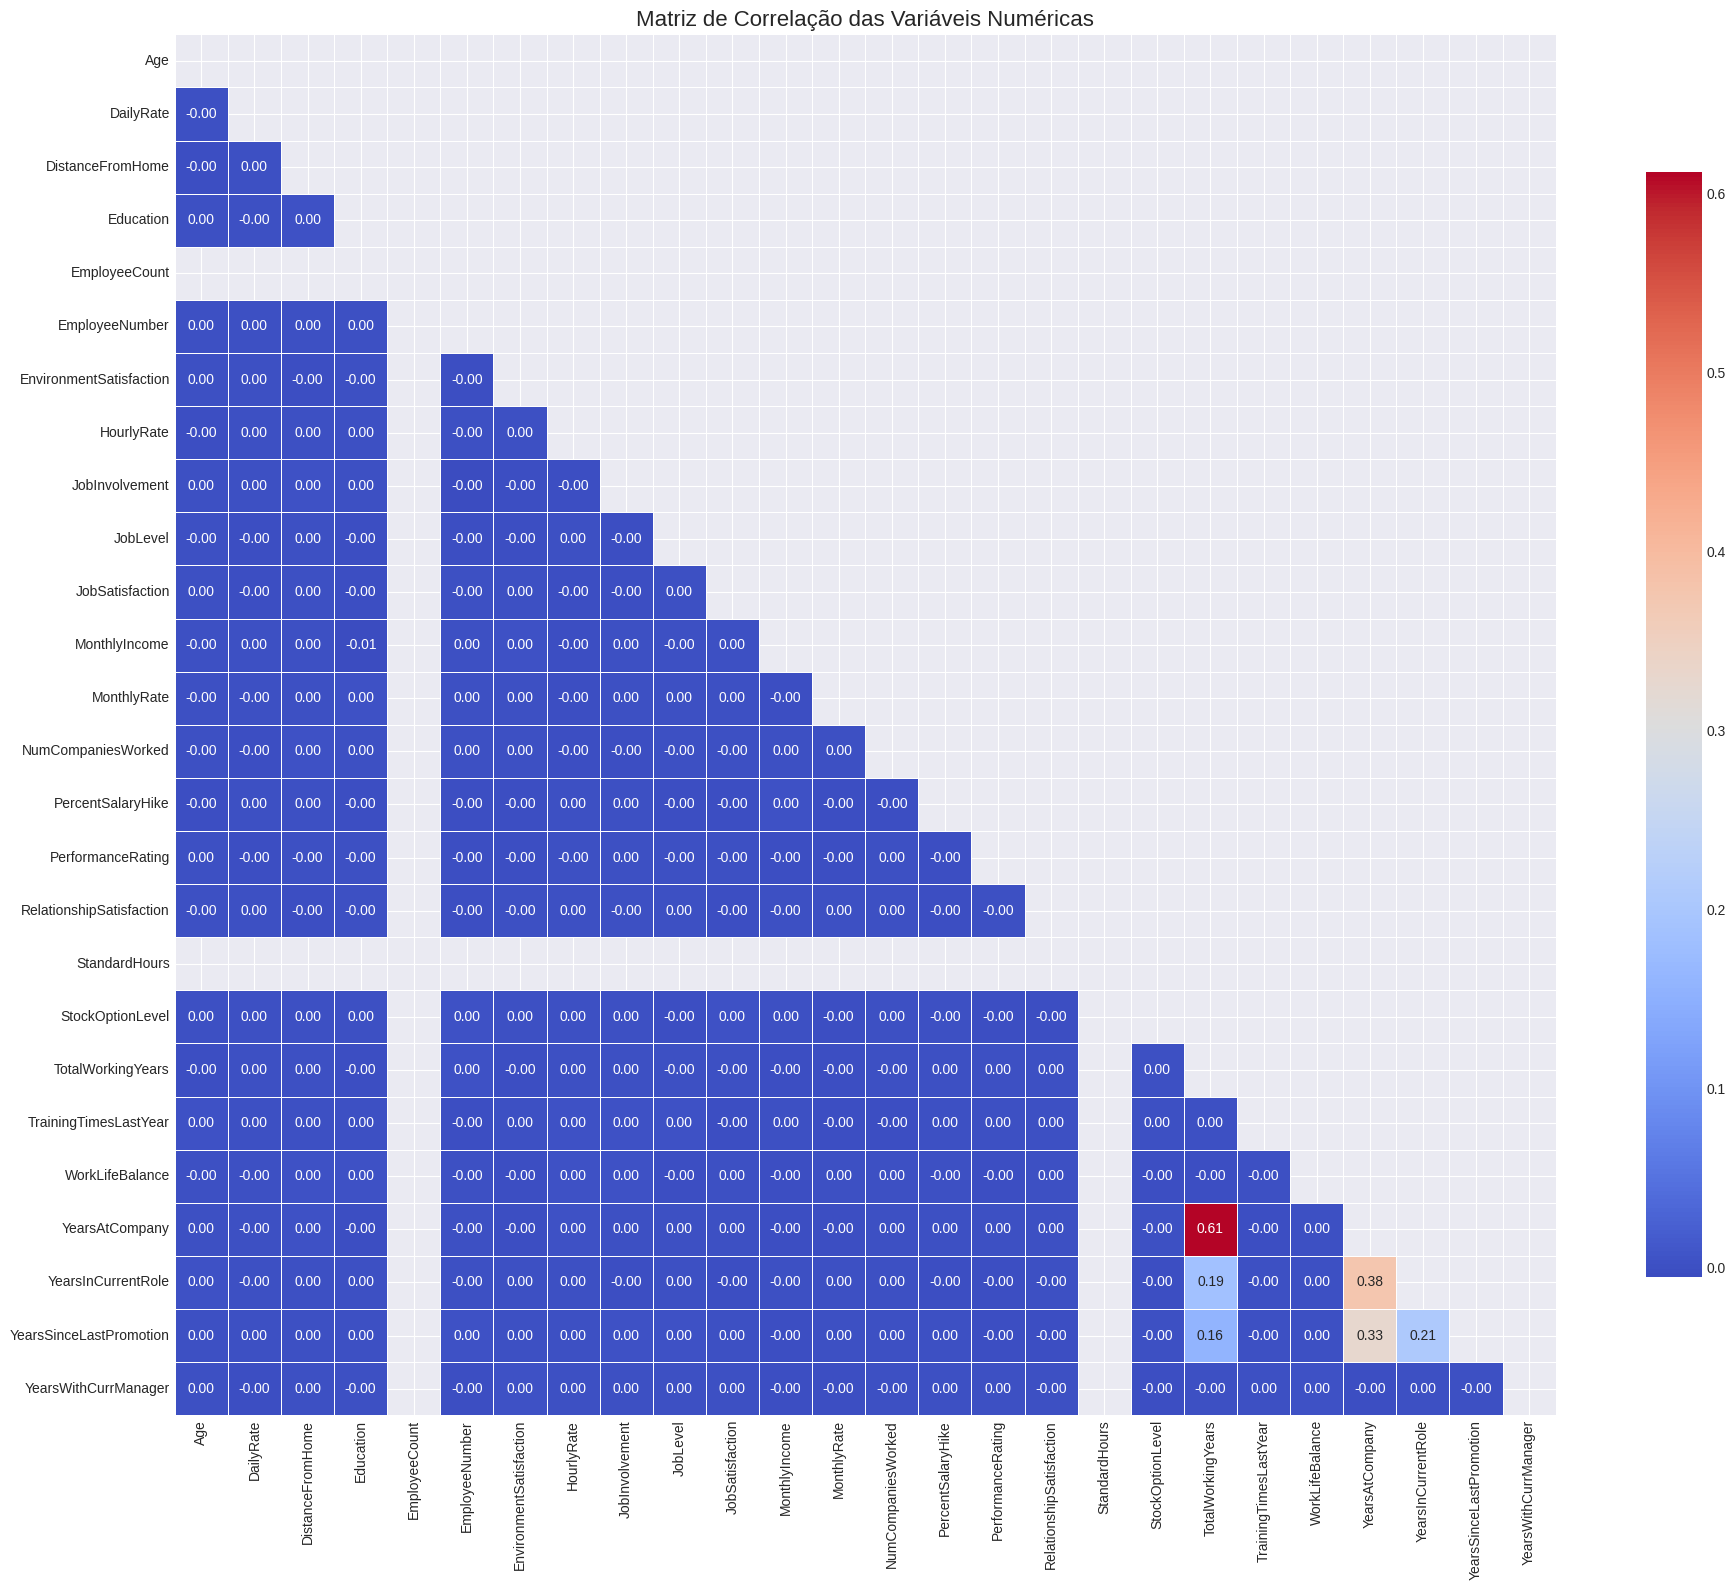


=== VARIÁVEIS CATEGÓRICAS (9) ===
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


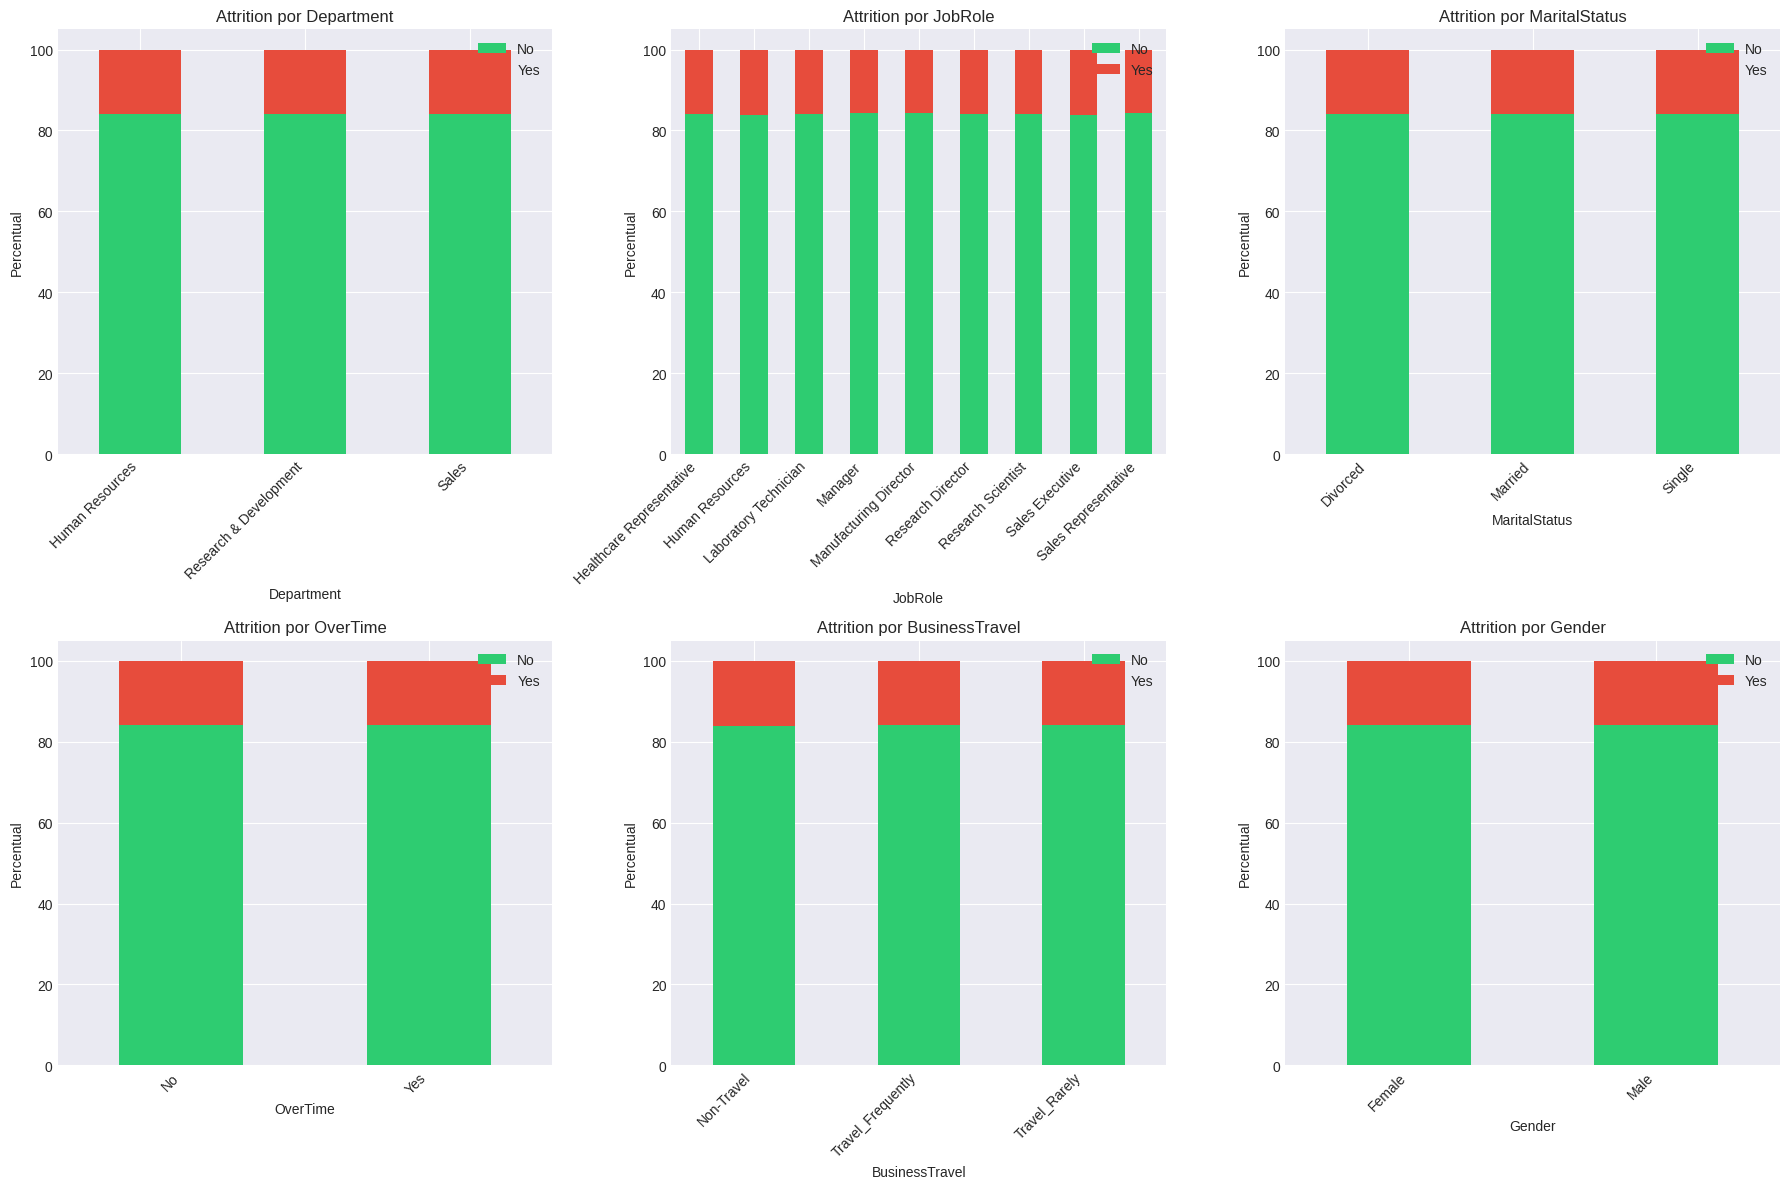

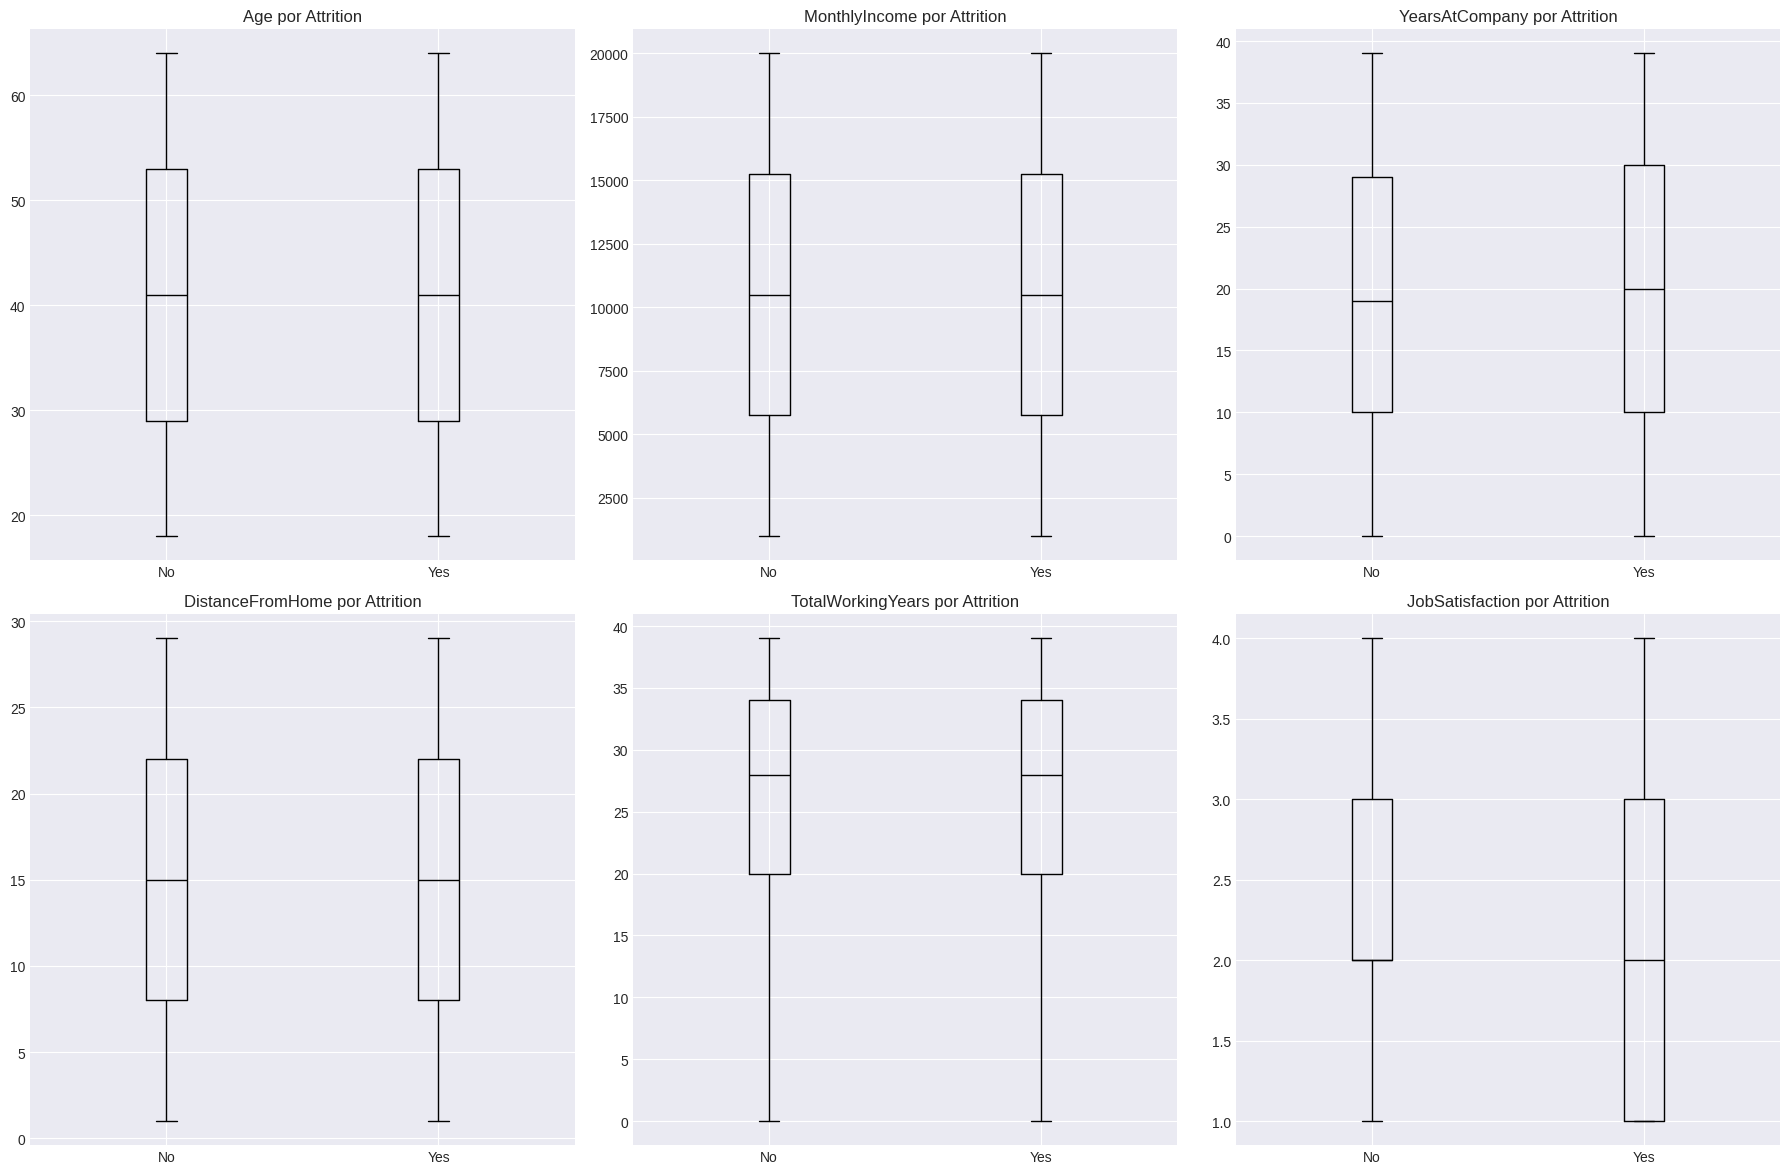

In [6]:


# Visualização da distribuição
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
attrition_counts.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
ax[0].set_title('Distribuição de Attrition')
ax[0].set_ylabel('Quantidade')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Gráfico de pizza
attrition_counts.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
ax[1].set_title('Proporção de Attrition')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

# 2.3 Análise de missing values
print("\n=== ANÁLISE DE VALORES AUSENTES ===")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Não há valores ausentes no dataset!")
else:
    print(missing_values[missing_values > 0])

# 2.4 Análise de variáveis numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\n=== VARIÁVEIS NUMÉRICAS ({len(numeric_cols)}) ===")
print(numeric_cols.tolist())

# Matriz de correlação
plt.figure(figsize=(20, 16))
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# 2.5 Análise de variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\n=== VARIÁVEIS CATEGÓRICAS ({len(categorical_cols)}) ===")
print(categorical_cols.tolist())

# Análise de attrition por variáveis categóricas importantes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

important_cats = ['Department', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel', 'Gender']

for idx, col in enumerate(important_cats):
    crosstab = pd.crosstab(df[col], df['Attrition'])
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    crosstab_pct.plot(kind='bar', ax=axes[idx], stacked=True, color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Attrition por {col}')
    axes[idx].set_ylabel('Percentual')
    axes[idx].legend(['No', 'Yes'], loc='upper right')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 2.6 Análise de distribuições numéricas por Attrition
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

important_nums = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome',
                  'TotalWorkingYears', 'JobSatisfaction']

for idx, col in enumerate(important_nums):
    df.boxplot(column=col, by='Attrition', ax=axes[idx], color='black')
    axes[idx].set_title(f'{col} por Attrition')
    axes[idx].set_xlabel('')

plt.suptitle('')
plt.tight_layout()
plt.show()